In [1]:
import numpy as np
import pandas as pd
from coactivation.process import *
from coactivation.visualize import *
import matplotlib.pyplot as plt

from scipy.stats import ks_2samp
from sklearn.cluster import KMeans
from scipy.spatial.distance import cosine

import os


In [2]:
dfgt = generate_coactivation_by_gt()
dfgt

collected_data/2025_02_21
yz_static_resting.csv
om_wrist_movement_open.csv
yz_wrist_movement_relax.csv
mk_grasp_ball.csv
yz_wrist_movement_open.csv
om_arm_movement_relax.csv
yz_arm_movement_close.csv
om_static_reaching.csv
om_static_unsupported.csv
om_wrist_movement_close.csv
mk_wrist_movement_open.csv
om_grasp_soup.csv
yz_grasp_soup.csv
om_static_resting.csv
mk_arm_movement_close.csv
mk_static_resting.csv
yz_arm_movement_open.csv
mk_wrist_movement_relax.csv
mk_arm_movement_relax.csv
mk_static_unsupported.csv
yz_static_reaching.csv
om_static_hanging.csv
yz_static_hanging.csv
mk_wrist_movement_close.csv
mk_static_reaching.csv
mk_grasp_soup.csv
mk_arm_movement_open.csv
yz_wrist_movement_close.csv
yz_arm_movement_relax.csv
om_arm_movement_close.csv
om_arm_movement_open.csv
yz_static_unsupported.csv
yz_grasp_ball.csv
om_wrist_movement_relax.csv
om_grasp_ball.csv
mk_static_hanging.csv
collected_data/2025_02_07_hand_labeled
collected_data/2025_02_27
co_arm_movement_relax.csv
co_static_unsupp

,folder,subject_id,hand,set_num,subset,is_patient,gt,window,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
0,2025_02_21,yz,nan,static,static,False,0,0,0.007812,0.015625,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812
1,2025_02_21,yz,nan,static,static,False,1,1,0.023438,0.062500,0.109375,0.031250,0.015625,0.023438,0.015625,0.015625
2,2025_02_21,yz,nan,static,static,False,2,2,0.093750,0.078125,0.070312,0.062500,0.015625,0.015625,0.023438,0.039062
3,2025_02_21,yz,nan,static,static,False,1,3,0.031250,0.062500,0.113281,0.039062,0.015625,0.023438,0.023438,0.023438
4,2025_02_21,yz,nan,static,static,False,0,4,0.015625,0.023438,0.023438,0.015625,0.007812,0.007812,0.007812,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2025_02_07,bw,nan,grasp,grasp,False,0,4,0.031250,0.015625,0.023438,0.023438,0.015625,0.015625,0.015625,0.015625
1473,2025_02_07,bw,nan,grasp,grasp,False,2,5,0.218750,0.132812,0.164062,0.132812,0.046875,0.031250,0.039062,0.085938
1474,2025_02_07,bw,nan,grasp,grasp,False,0,6,0.039062,0.023438,0.046875,0.039062,0.015625,0.015625,0.015625,0.015625
1475,2025_02_07,jp,right,arm_movement,arm_movement,False,0,0,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625


In [3]:
df = generate_coactivation_dataset()
df

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg4,gt2emg5,gt2emg6,gt2emg7,folder,subject_id,hand,set_num,subset,is_patient
0,0.015625,0.023438,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.023438,0.054688,...,0.015625,0.015625,0.023438,0.046875,2025_02_21,yz,nan,static,resting,False
0,0.015625,0.039062,0.062500,0.117188,0.023438,0.015625,0.023438,0.015625,0.085938,0.054688,...,0.085938,0.031250,0.054688,0.101562,2025_02_21,om,nan,static,reaching,False
0,0.015625,0.031250,0.054688,0.117188,0.031250,0.015625,0.015625,0.007812,0.062500,0.054688,...,0.117188,0.046875,0.070312,0.117188,2025_02_21,om,nan,static,unsupported,False
0,0.015625,0.101562,0.140625,0.054688,0.015625,0.023438,0.078125,0.046875,0.085938,0.156250,...,0.078125,0.039062,0.101562,0.117188,2025_02_21,om,nan,static,resting,False
0,0.007812,0.007812,0.015625,0.007812,0.007812,0.007812,0.007812,0.007812,0.046875,0.046875,...,0.062500,0.023438,0.023438,0.031250,2025_02_21,mk,nan,static,resting,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.007812,0.007812,0.007812,0.015625,0.023438,0.015625,0.007812,0.007812,0.007812,0.023438,...,0.062500,0.031250,0.031250,0.039062,2025_02_07,si,left,static,unsupported,False
0,0.007812,0.007812,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.015625,0.023438,...,0.023438,0.015625,0.015625,0.015625,2025_02_07,si,left,static,resting,False
0,0.007812,0.007812,0.015625,0.023438,0.023438,0.015625,0.007812,0.007812,0.007812,0.031250,...,0.031250,0.015625,0.023438,0.031250,2025_02_07,ls,nan,static,unsupported,False
0,0.023438,0.031250,0.031250,0.023438,0.023438,0.007812,0.015625,0.015625,0.054688,0.070312,...,0.031250,0.023438,0.031250,0.062500,2025_02_07,bw,nan,static,hanging,False


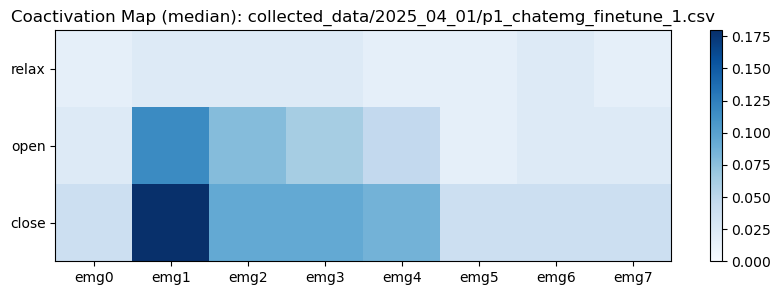

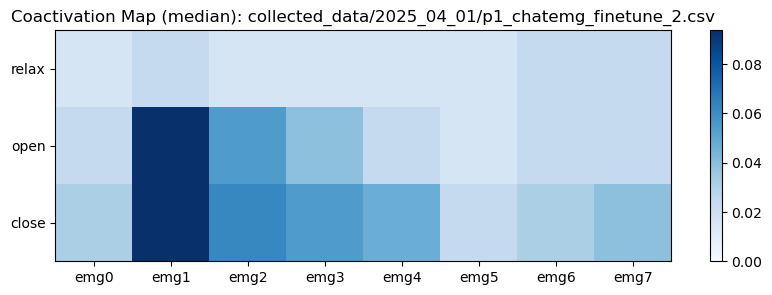

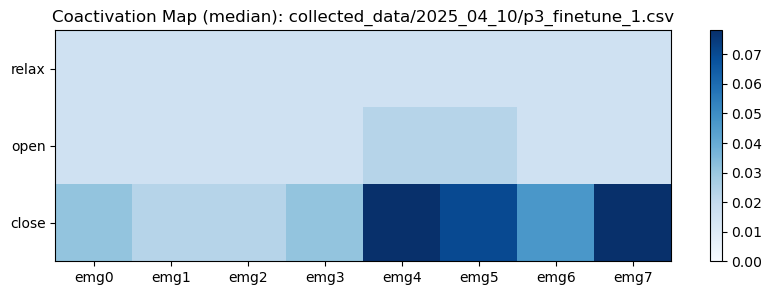

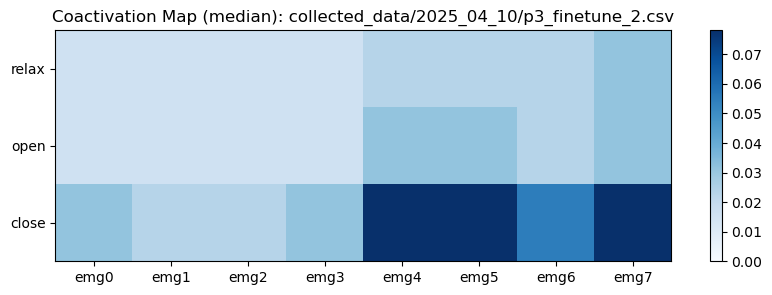

In [4]:
file = 'collected_data/2025_04_01/p1_chatemg_finetune_1.csv'

df1 = preprocess_emgs(file, hz=200)
cm = get_coactivation_map(df1)
plot_coactivation_map(cm, vmax=0, title = file)

file = 'collected_data/2025_04_01/p1_chatemg_finetune_2.csv'
df1 = preprocess_emgs(file, hz=200)
cm = get_coactivation_map(df1)
plot_coactivation_map(cm, vmax=0, title=file)

file = 'collected_data/2025_04_10/p3_finetune_1.csv'
df1 = preprocess_emgs(file, hz=200)
cm = get_coactivation_map(df1)
plot_coactivation_map(cm, vmax=0, title=file)

file = 'collected_data/2025_04_10/p3_finetune_2.csv'
df1 = preprocess_emgs(file, hz=200)
cm = get_coactivation_map(df1)
plot_coactivation_map(cm, vmax=0, title=file)

# accuracy stuff

In [5]:
df_accuracy = pd.DataFrame(columns=['subject_id', 'final_accuracy'])
accuracy_folder = 'data_slack/accuracy_over_epochs_csv/'
for root, _, files in os.walk(accuracy_folder):
    for file in files:
        temp_df = pd.read_csv(accuracy_folder + file)
        df_accuracy.loc[len(df_accuracy)] = {'subject_id': file[9:11], 'final_accuracy': temp_df.iloc[-1].event_accuracy}
df_accuracy

,subject_id,final_accuracy
0,mk,0.909091
1,wn,0.454545
2,es,0.590909
3,bw,0.568182
4,jl,0.750000
5,bg,0.681818
6,om,0.795455
7,ls,0.568182
8,jp,0.659091
9,jh,0.409091


In [6]:
def gradient(arr):
    grad = np.empty_like(arr)
    grad[:-1] = np.diff(arr)
    grad[-1] = arr[0]-arr[-1]
    return grad

def mi(x, y, bins=8):
    def entropy(arr):
        _, counts = np.unique(arr, return_counts=True)
        p = counts / counts.sum()
        return -np.sum(p * np.log2(p))
    def joint_entropy(a, b):
        pairs = np.column_stack((a, b))
        _, counts = np.unique(pairs, axis=0, return_counts=True)
        p = counts / counts.sum()
        return -np.sum(p * np.log2(p))
    return entropy(x) + entropy(y) - joint_entropy(x, y)

def g(x, y):
    gradx = gradient(x)
    grady = gradient(y)
    G = 0
    for i in range(len(x)):
        alpha = np.arccos(np.dot(gradx[i], grady[i]) / (abs(gradx[i]) * abs(grady[i])))
        if alpha!=alpha:
            alpha=0
        w = (np.cos(2*alpha)+1)/2
        G += w * min(abs(gradx[i]), abs(grady[i]))
    return G

def gmi(cm1, cm2, bins=8):
    values=[]
    for i in range(3):
        G = g(cm1.iloc[i,:].values, cm2.iloc[i,:].values)
        I = mi(cm1.iloc[i,:].values, cm2.iloc[i,:].values, bins)
        values.append(G*I)
    return values, np.mean(values)

def mi_cm(cm1, cm2, bins=10):
    values=[]
    for i in range(3):
        I = mi(cm1.iloc[i,:].values, cm2.iloc[i,:].values, bins)
        values.append(I)
    return values, np.mean(values)

def g_cm(cm1, cm2):
    values=[]
    for i in range(3):
        G = g(cm1.iloc[i,:].values, cm2.iloc[i,:].values)
        values.append(G)
    return values, np.mean(values)

def apply_mi(x):
    return (mi_cm(array_to_cm(x.values), cm_avg)[1])

def apply_g(x):
    return (g_cm(array_to_cm(x.values), cm_avg)[1])

def apply_cosine(x):
    return (cosine(x, cm_to_array(cm_avg)))

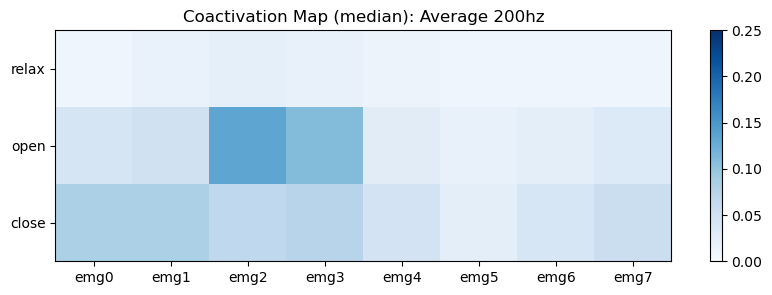

In [7]:
df_avg = df.iloc[:,:24].mean()
cm_avg = array_to_cm(df_avg.values)
plot_coactivation_map(cm_avg, title='Average 200hz')

In [8]:
df['mean'] = df.iloc[:,:24].mean(axis=1)
df['mi'] = df.iloc[:, :24].apply(apply_mi, axis=1) 
df['g'] = df.iloc[:, :24].apply(apply_g, axis=1)
df['gmi'] = df.g*df.mi
df['cosine'] = df.iloc[:, :24].apply(apply_cosine, axis=1)
df = pd.merge(df, df_accuracy, on='subject_id', how='left')
df

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_38735/1256517812.py:24: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.arccos(np.dot(gradx[i], grady[i]) / (abs(gradx[i]) * abs(grady[i])))


,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,hand,set_num,subset,is_patient,mean,mi,g,gmi,cosine,final_accuracy
0,0.015625,0.023438,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.023438,0.054688,...,nan,static,resting,False,0.034505,2.103759,0.079031,0.166262,0.061933,0.795455
1,0.015625,0.039062,0.062500,0.117188,0.023438,0.015625,0.023438,0.015625,0.085938,0.054688,...,nan,static,reaching,False,0.083333,2.635213,0.127944,0.337159,0.068859,0.795455
2,0.015625,0.031250,0.054688,0.117188,0.031250,0.015625,0.015625,0.007812,0.062500,0.054688,...,nan,static,unsupported,False,0.096029,2.353759,0.128000,0.301282,0.082410,0.795455
3,0.015625,0.101562,0.140625,0.054688,0.015625,0.023438,0.078125,0.046875,0.085938,0.156250,...,nan,static,resting,False,0.122396,2.833333,0.125747,0.356284,0.026833,0.795455
4,0.007812,0.007812,0.015625,0.007812,0.007812,0.007812,0.007812,0.007812,0.046875,0.046875,...,nan,static,resting,False,0.044596,1.733068,0.104099,0.180410,0.047763,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.007812,0.007812,0.007812,0.015625,0.023438,0.015625,0.007812,0.007812,0.007812,0.023438,...,left,static,unsupported,False,0.028646,1.682932,0.059432,0.100019,0.063082,NaN
111,0.007812,0.007812,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.015625,0.023438,...,left,static,resting,False,0.020182,1.457519,0.063021,0.091854,0.052109,NaN
112,0.007812,0.007812,0.015625,0.023438,0.023438,0.015625,0.007812,0.007812,0.007812,0.031250,...,nan,static,unsupported,False,0.025065,1.801880,0.071796,0.129367,0.063887,0.568182
113,0.023438,0.031250,0.031250,0.023438,0.023438,0.007812,0.015625,0.015625,0.054688,0.070312,...,nan,static,hanging,False,0.050130,2.468546,0.109194,0.269550,0.019163,0.568182


Text(0.5, 1.0, 'Mean Coactivation vs Final Accuracy')

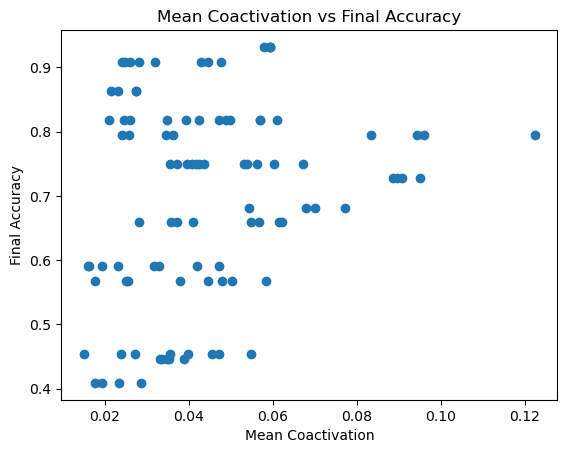

In [9]:
# mean against final_accuracy
plt.scatter(df['mean'], df['final_accuracy'])
plt.xlabel('Mean Coactivation')
plt.ylabel('Final Accuracy')
plt.title('Mean Coactivation vs Final Accuracy')

Text(0.5, 1.0, 'MI vs Final Accuracy')

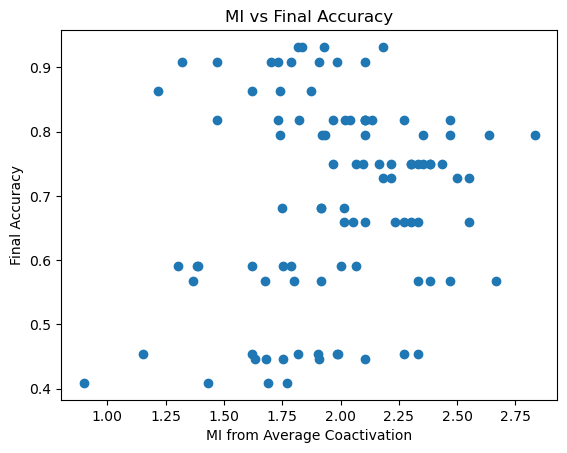

In [10]:
# mi against final_accuracy
plt.scatter(df['mi'], df['final_accuracy'])
plt.xlabel('MI from Average Coactivation')
plt.ylabel('Final Accuracy')
plt.title('MI vs Final Accuracy')

Text(0.5, 1.0, 'G vs Final Accuracy')

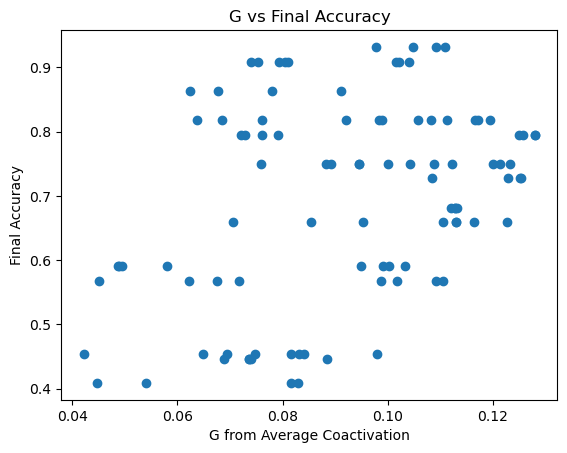

In [11]:
# g against final accuracy 
plt.scatter(df['g'], df['final_accuracy'])
plt.xlabel('G from Average Coactivation')
plt.ylabel('Final Accuracy')
plt.title('G vs Final Accuracy')

Text(0.5, 1.0, 'GMI vs Final Accuracy')

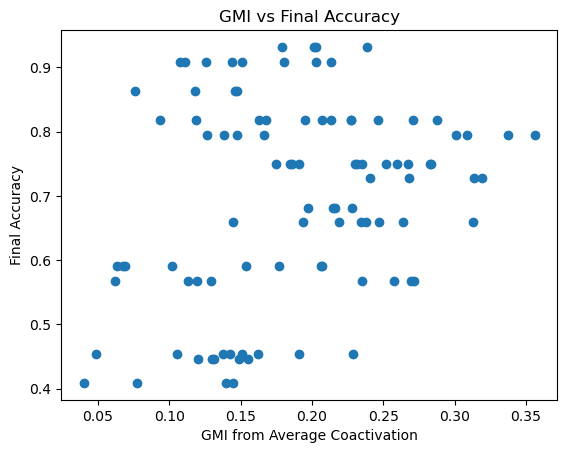

In [12]:
# gmi against final accuracy
plt.scatter(df['gmi'], df['final_accuracy'])
plt.xlabel('GMI from Average Coactivation')
plt.ylabel('Final Accuracy')
plt.title('GMI vs Final Accuracy')

Text(0.5, 1.0, 'Cosine Similarity vs Final Accuracy')

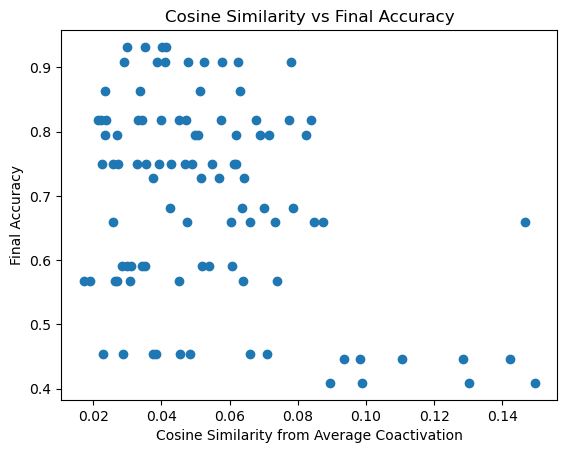

In [13]:
# cos against final_accuracy
plt.scatter(df['cosine'], df['final_accuracy'])
plt.xlabel('Cosine Similarity from Average Coactivation')
plt.ylabel('Final Accuracy')
plt.title('Cosine Similarity vs Final Accuracy')